# COGS 108 - Final Project 

# How High Is the U.S.?

# Overview

As marijuana becomes legalized and viewed as a norm in U.S. culture, we want to explore marijuana usage as it relates to people's living conditions. In exploring the relationship between marijuana usage and important factors like age, education levels, and socioeconomic status, we can gain a better understanding of who is prone or susceptible to using based on their living conditions as it could affect their overall living experiences.

# Names

- Gregory Thein
- Queen Tran
- Shiva Upadhye
- Diana Thai
- Osvaldo Vazquez
- Sophie Concordel 

# Group Members IDs

- Gregory - A14369060
- Queen - FILL
- Shiva - FILL
- Diana - A12855877
- Osvaldo - A14418440
- Sophie - FILL

# Research Question

We want to explore how various living conditions throughout the country is related to marijuana usage, making us prompt the question: 

“What is the relationship between marijuana usage, age, and socioeconomic status throughout the United States?”


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We believe that there would be three groups that would have increased marijuana usage from the various factors that we decide to study on. 

First, younger people (anyone younger than 26) will have a higher rate of marijuana usage because of the social popularity and culture behind this drug amongst the youth. 

Second, we predict that as the income and education level increase (higher socioeconomic status), there should be a negative relationship with drug use, meaning that the higher the income and education level, the lower the marijuana use. 

Finally, we also believe that there could be a high usage of medical marijuana in elderly and sick people as the popularity of medical marijuana increases throughout the country. 

# Dataset(s)

We decided to use two datasets for our analysis. After searching long and hard, we found the treasure that is the NHANES (National Health and Nutrition Examination Survey) had a lot of data, allowing us to collect a lot of information for a lot of people. There were multiple datasets from this page, organized by year and categories. We decided to use the 2015-2016 dataset since it was the most relevant completed dataset that was publically available. We decided to utilize the Demographics dataset since it contained most of our information about age and socioeconomic status and the Drug Usage dataset that allowed us to see the marijuana usage for the data. 


***TO DO***
- Dataset Name:
- Link to the dataset:
- Number of observations:

- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
demographics = pd.read_sas('data/DEMO_I.XPT')
demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


In [4]:
questionaire = pd.read_sas('data/DUQ_I.XPT')
questionaire.head()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [5]:
merged = pd.merge(demographics, questionaire, on = 'SEQN')
merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,9.0,2.0,1.0,22.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'INDHHIN2', 
        'INDFMPIR', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DUQ200', 'DUQ210', 'DUQ217', 'DUQ211', 
        'DUQ213', 'DUQ215Q', 'DUQ219', 'DUQ220Q', 'DUQ230']
df = merged[cols]
df['CHILDREN_NUM'] = df['DMDHHSZA'] + df['DMDHHSZB']
df = df.drop(columns = ['DMDHHSZA', 'DMDHHSZB'])

In [7]:
lst_7 = ['DMDEDUC2', 'DUQ200', 'DUQ217', 'DUQ211', 'DUQ219']
lst_77 = ['DMDMARTL', 'DMDEDUC3', 'INDHHIN2']
lst_777 = ['DUQ210', 'DUQ213', 'DUQ230']

for i in lst_7:
    df[i] = df[i].replace({7: 7777, 9: 9999})
for i in lst_77:
    df[i] = df[i].replace({77: 7777, 99: 9999})
for i in lst_777:
    df[i] = df[i].replace({777: 7777, 999: 9999})

In [8]:
translation_dict = {'SEQN': 'ID', 'RIAGENDR': 'GENDER', 'RIDAGEYR': 'AGE', 'DMDMARTL': 'MARRIAGE', 
                    'RIDEXPRG': 'PREGNANCY', 'INDHHIN2': 'INCOME', 'INDFMPIR': 'INCOME_RATIO', 
                    'DMDHHSIZ': 'HOUSEHOLD_NUM', 'DMDHHSZE': 'OVER_60_NUM', 'DUQ200': 'EVER_USE', 
                    'DUQ210': 'FIRST_USAGE', 'DUQ217': 'FREQUENCY', 'DUQ211': 'PER_MONTH', 
                    'DUQ213': 'PER_YEAR', 'DUQ215Q': 'LAST_ONCE_MONTH', 'DUQ219': 'AMOUNT', 'DUQ220Q': 'LAST_USAGE', 
                    'DUQ230': 'PAST_MONTH_USAGE', 'DMDEDUC2': 'EDUCATION_ADULT', 'DMDEDUC3': 'EDUCATION_KID'}
df = df.rename(index = str, columns = translation_dict)
df.head(10)

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,5.397605e-79,4.0,1.0,30.0,2.000000e+00
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.000000e+00,2.0,1.0,25.0,1.079521e-78
5,83742.0,2.0,32.0,NaN,4.0,1.0,2.0,6.0,1.03,4.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,13.0,NaN,2.000000e+00
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
7,83744.0,1.0,56.0,NaN,3.0,3.0,NaN,3.0,1.19,1.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,20.0,NaN,1.079521e-78
8,83747.0,1.0,46.0,NaN,5.0,6.0,NaN,3.0,0.75,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
9,83750.0,1.0,45.0,NaN,2.0,5.0,NaN,10.0,1.36,5.0,...,1.0,21.0,NaN,2.0,NaN,NaN,NaN,20.0,1.0,2.000000e+00


In [9]:
#OVER_60_NUM
#LAST_ONCE_MONTH
#CHILDREN_NUM
df['OVER_60_NUM'] = df['OVER_60_NUM'].round(0)
df['LAST_ONCE_MONTH'] = df['LAST_ONCE_MONTH'].round(0)
df['CHILDREN_NUM'] = df['CHILDREN_NUM'].round(0)
df['INCOME_RATIO'] = df['INCOME_RATIO'].replace({5.397605e-79: 0}).round(2)

In [10]:
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [11]:
#write dataframe to csv file
df.to_csv("cleaned_marijuana_data.csv")

# Data Exploratory

In [12]:
df.describe(include='all')

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
count,4843.000000,4843.000000,4843.000000,261.000000,4582.000000,4582.000000,1240.000000,4675.000000,4377.000000,4843.000000,...,3428.000000,1715.000000,870.000000,1715.000000,870.000000,864.000000,870.000000,1.713000e+03,546.000000,4843.000000
mean,88672.875077,1.522816,42.860211,13.639847,3.492580,6.130292,1.979839,300.427166,2.425833,3.517654,...,17.052800,17.289796,33.031034,6.026239,18.013793,26.756944,22.404598,3.572796e+01,49.080586,1.062358
std,2873.134105,0.499531,15.046097,6.711685,1.277588,162.416967,0.303990,1582.121412,1.616415,1.698411,...,374.406203,4.558000,503.162908,187.757903,5.129602,373.884673,429.130785,4.710994e+02,603.969539,1.332804
min,83732.000000,1.000000,18.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,6.000000,0.000000,1.000000,5.397605e-79,1.000000,0.000000
25%,86174.000000,1.000000,30.000000,12.000000,3.000000,1.000000,2.000000,6.000000,1.050000,2.000000,...,1.000000,15.000000,3.000000,1.000000,15.000000,1.000000,1.000000,2.000000e+00,2.000000,0.000000
50%,88677.000000,2.000000,43.000000,13.000000,4.000000,1.000000,2.000000,8.000000,2.040000,3.000000,...,1.000000,17.000000,4.000000,1.000000,17.000000,3.000000,2.000000,5.000000e+00,6.000000,1.000000
75%,91164.000000,2.000000,56.000000,14.000000,5.000000,5.000000,2.000000,14.000000,3.790000,5.000000,...,2.000000,19.000000,5.000000,2.000000,20.000000,12.000000,3.000000,1.500000e+01,25.000000,2.000000
max,93702.000000,2.000000,69.000000,66.000000,5.000000,7777.000000,3.000000,9999.000000,5.000000,7.000000,...,9999.000000,50.000000,9999.000000,7777.000000,50.000000,7777.000000,9999.000000,9.999000e+03,9999.000000,7.000000


In [13]:
# Basic questions about the dataset

# 1. The number of entries in the dataset
print(df.shape)
# We have 4843 rows and 21 columns 

# 2. Total number of areas that contribute to marijuana usage and their unique values of the columns 
print("*****************")
print(df.nunique())

# Confirm the number of missing values in each column.
print("*****************")
print(df.isnull().sum())

(4843, 21)
*****************
ID                  4843
GENDER                 2
AGE                   52
EDUCATION_KID          8
EDUCATION_ADULT        5
MARRIAGE               7
PREGNANCY              3
INCOME                16
INCOME_RATIO         427
HOUSEHOLD_NUM          7
OVER_60_NUM            4
EVER_USE               4
FIRST_USAGE           38
FREQUENCY              7
PER_MONTH              3
PER_YEAR              38
LAST_ONCE_MONTH       45
AMOUNT                 6
LAST_USAGE            51
PAST_MONTH_USAGE      30
CHILDREN_NUM           8
dtype: int64
*****************
ID                     0
GENDER                 0
AGE                    0
EDUCATION_KID       4582
EDUCATION_ADULT      261
MARRIAGE             261
PREGNANCY           3603
INCOME               168
INCOME_RATIO         466
HOUSEHOLD_NUM          0
OVER_60_NUM            0
EVER_USE            1415
FIRST_USAGE         3128
FREQUENCY           3973
PER_MONTH           3128
PER_YEAR            3973
LAST_ONCE_MONTH

## The following plot bar graph shows how empty values were dealt with, so that the data would not obscured

### The x-axis reprensents the total number of inquiries, y-axis shows the reported total annual income

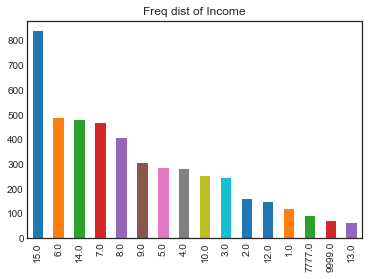

In [17]:
#Value with 7777.0 and 9999.0 are consider to be not reported values(empty)
df['INCOME'].value_counts().plot.bar(title="Freq dist of Income")

## The following distplot graphs shows where the most frequent responces are and how they compare to the other responces, for each specific column that had no missing values(so that the data would be obscure with the added fill in values{7777.0, 9999.0})

### For the first graph, the column is Gender, where the x-axis represents either male(1.0) or female(2.0), and y-axis the total count in the thousands.
### For the second graph, the column is Age, where the x-axis represents the different ages, y-axis represents the 
### For the third graph, the column is Children_num, where the x-axis represents the different ages, y-axis represents the 
### For the fourth graph, the column is people over 60 years, where the x-axis represents the different ages, y-axis represents the 
### For the fifth graph, the column is Household number, where the x-axis represents the different ages, y-axis represents the 

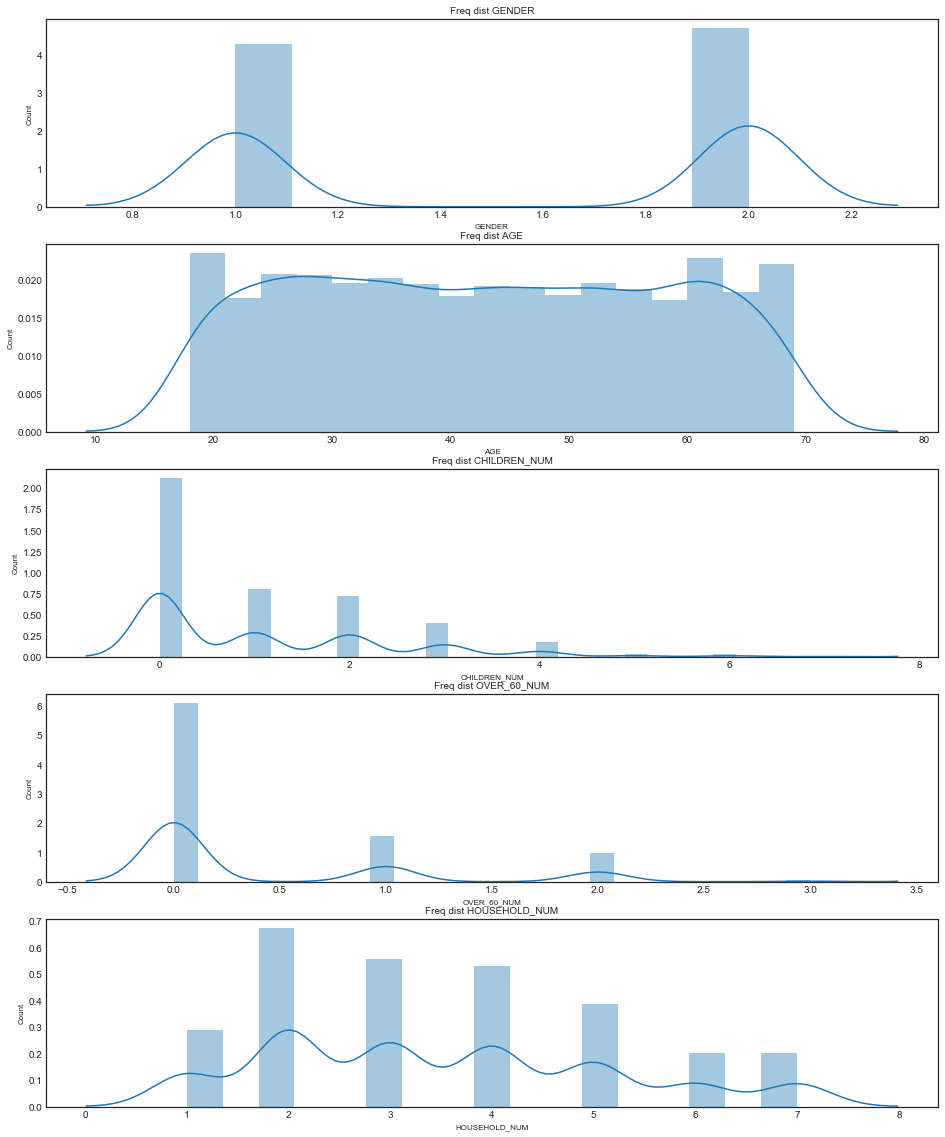

In [18]:
#Taking a look at the columns without any missing values.
col_names = ['GENDER','AGE','CHILDREN_NUM','OVER_60_NUM','HOUSEHOLD_NUM']

fig, ax = plt.subplots(len(col_names), figsize=(16,20))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

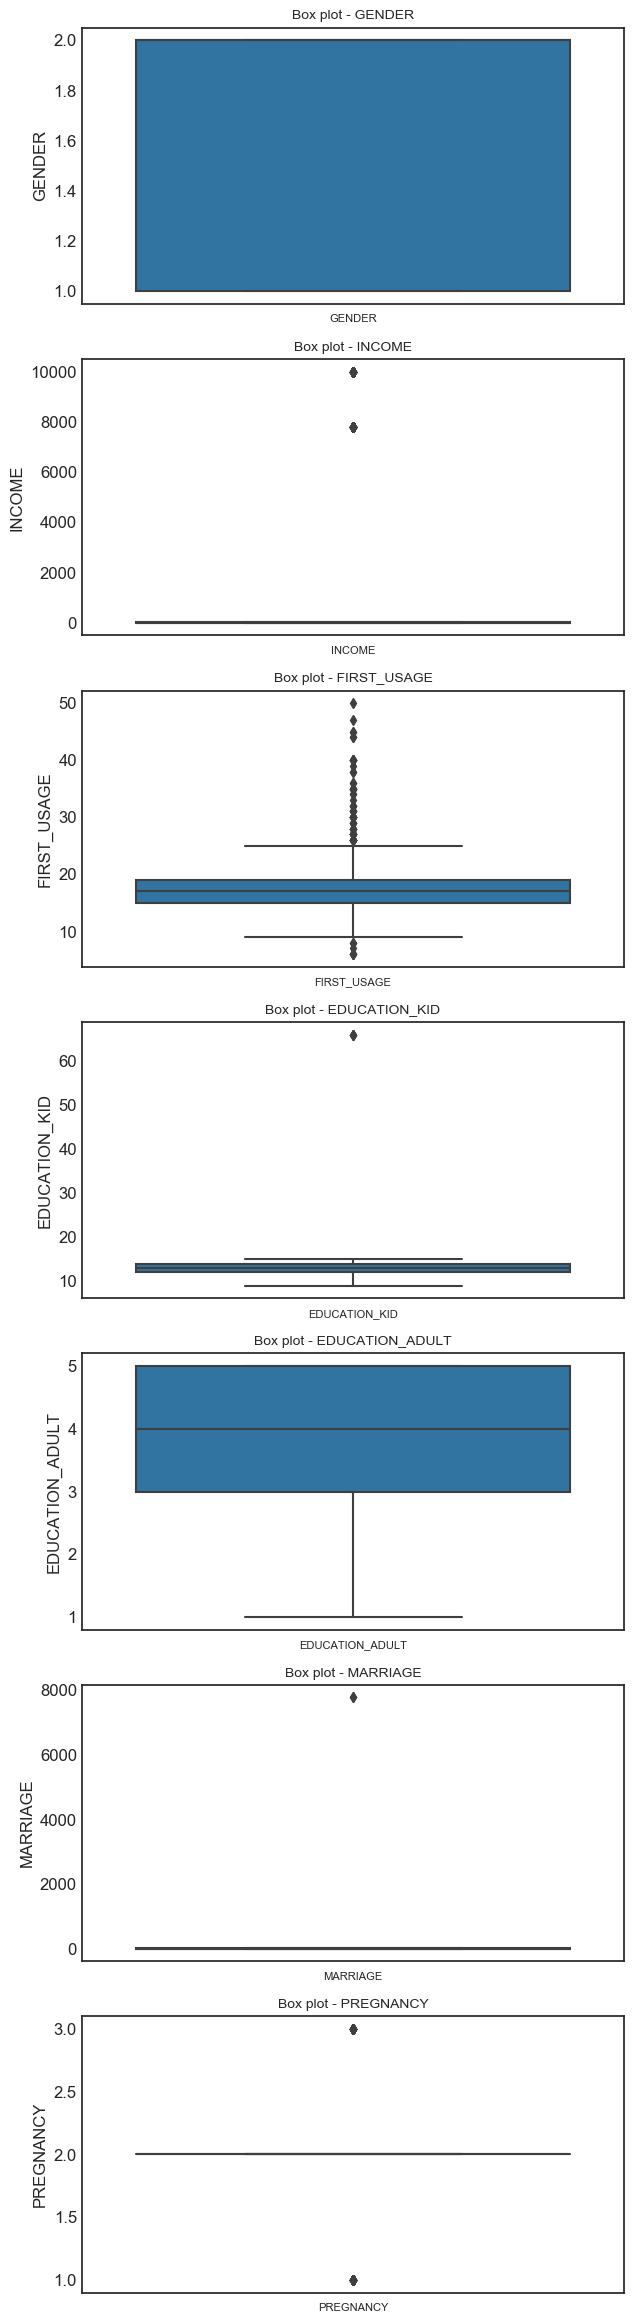

In [79]:
#We will use an outlier to detect any margin of error that the data might have 

col_names = ['GENDER','INCOME','FIRST_USAGE','EDUCATION_KID','EDUCATION_ADULT','MARRIAGE','PREGNANCY']

fig, ax = plt.subplots(len(col_names), figsize=(7,30))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

## The following graph takes the correlation of each column and comapres it with the other columns, to show the relation that all the columns share. This will help us focus on the specific columns. 

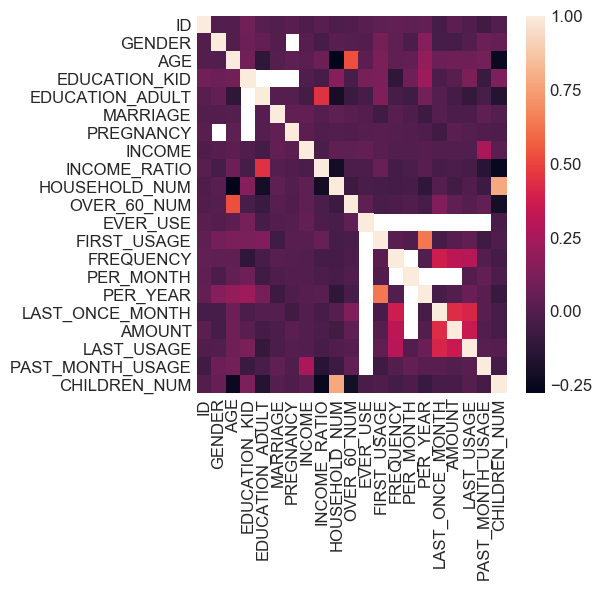

In [81]:
#Check if values have a correlation which each other , and if they do we can compare those values. 
f, ax = plt.subplots(figsize=(5, 5))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*